# Análisis exploratorio de Datos (EDA)

## 1. Carga y descripción inicial

En esta sección cargamos los datos, revisamos la estructura general del dataset y detectamos posibles problemas iniciales como valores nulos o tipos de datos inconsistentes.


In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")  # Estilo más limpio


In [5]:
df = load_data("../data/raw/customer_churn.csv")
explore_data(df)


Shape: (7043, 21)

Columnas y tipos de datos:
 customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Porcentaje de valores nulos por columna:
 customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         

## 2. Análisis univariado

Aquí analizamos la distribución de variables individuales: tanto la variable objetivo `Churn` como el resto de variables numéricas y categóricas.


Celda de código (gráfico de la variable objetivo):

📊 Distribución de Churn


c:\0_Proyectos\PortfolioDS\ChurnPrediction\notebooks\../src\data_prep\eda.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=target_col, palette='Set2')


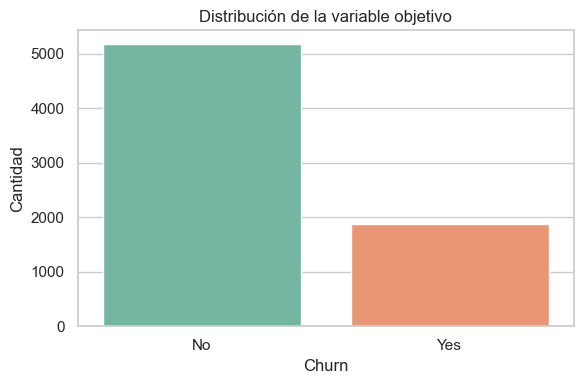

In [37]:
from data_prep.eda import plot_churn_distribution

def mostrar_distribucion_churn(df, target_col='Churn', titulo="Distribución de Churn"):
    if target_col in df.columns:
        print(f"📊 {titulo}")
        plot_churn_distribution(df, target_col)
    else:
        print(f"⚠️ La columna '{target_col}' no existe en el DataFrame.")

mostrar_distribucion_churn(df)

Celda de código (histogramas variables numéricas):

📊 Distribuciones de 3 variables numéricas.


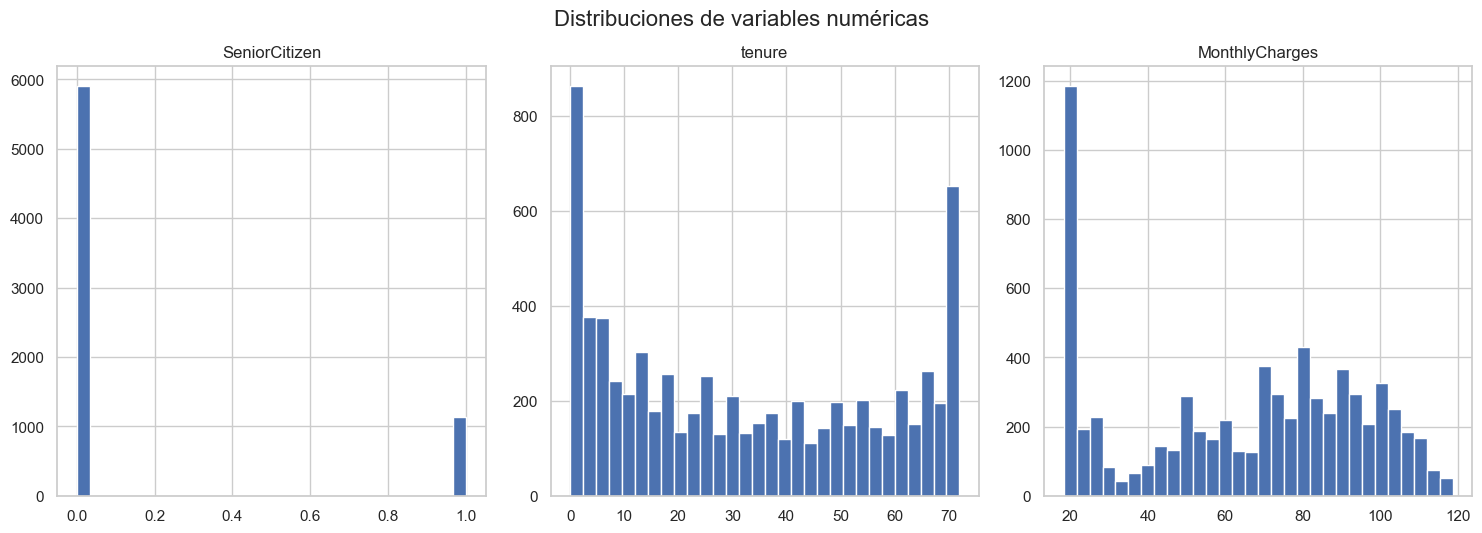

In [38]:
from data_prep.eda import plot_numerical_distributions

def mostrar_distribuciones_numericas(df, exclude_cols=["customerID"]):
    """Valida columnas numéricas y muestra su distribución."""
    num_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop(exclude_cols, errors='ignore')
    
    if len(num_cols) > 0:
        print(f"📊 Distribuciones de {len(num_cols)} variables numéricas.")
        plot_numerical_distributions(df, exclude_cols=exclude_cols)
    else:
        print("⚠️ No se encontraron variables numéricas para graficar.")

# Ejecutar
mostrar_distribuciones_numericas(df)


Celda de código (conteo de variables categóricas):


In [41]:
categoricas = df.select_dtypes(include='object').drop(columns=["customerID"]).columns
for col in categoricas:
    print(f"\n{col}:\n", df[col].value_counts())



gender:
 gender
Male      3555
Female    3488
Name: count, dtype: int64

Partner:
 Partner
No     3641
Yes    3402
Name: count, dtype: int64

Dependents:
 Dependents
No     4933
Yes    2110
Name: count, dtype: int64

PhoneService:
 PhoneService
Yes    6361
No      682
Name: count, dtype: int64

MultipleLines:
 MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

InternetService:
 InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

OnlineSecurity:
 OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

OnlineBackup:
 OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64

DeviceProtection:
 DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64

TechSupport:
 TechSup

## 3. Análisis bivariado

Exploramos la relación entre las variables independientes y la variable objetivo `Churn`, tanto para variables categóricas como numéricas.


Tablas de contingencia:

In [10]:
for col in categoricas:
    print(f"\nContingencia de {col} vs Churn:\n", pd.crosstab(df[col], df["Churn"], normalize="index"))



Contingencia de gender vs Churn:
 Churn         No       Yes
gender                    
Female  0.730791  0.269209
Male    0.738397  0.261603

Contingencia de Partner vs Churn:
 Churn          No       Yes
Partner                    
No       0.670420  0.329580
Yes      0.803351  0.196649

Contingencia de Dependents vs Churn:
 Churn             No       Yes
Dependents                    
No          0.687209  0.312791
Yes         0.845498  0.154502

Contingencia de PhoneService vs Churn:
 Churn               No       Yes
PhoneService                    
No            0.750733  0.249267
Yes           0.732904  0.267096

Contingencia de MultipleLines vs Churn:
 Churn                   No       Yes
MultipleLines                       
No                0.749558  0.250442
No phone service  0.750733  0.249267
Yes               0.713901  0.286099

Contingencia de InternetService vs Churn:
 Churn                  No       Yes
InternetService                    
DSL              0.810409  0.1

Boxplot para numéricas:

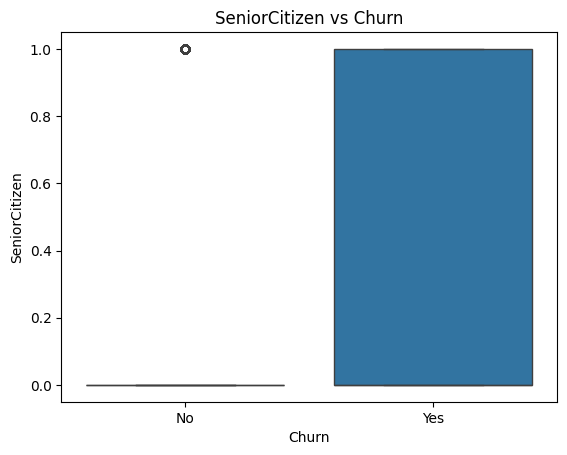

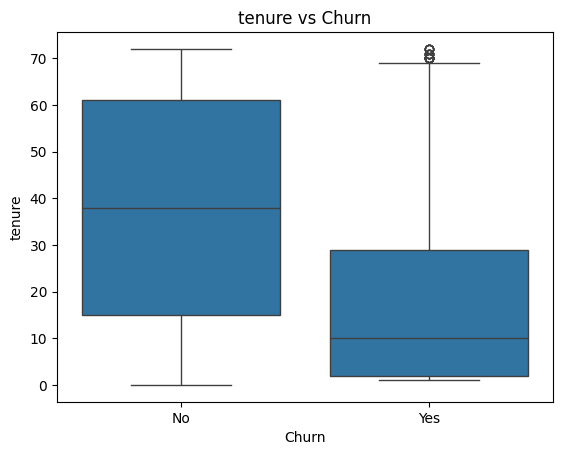

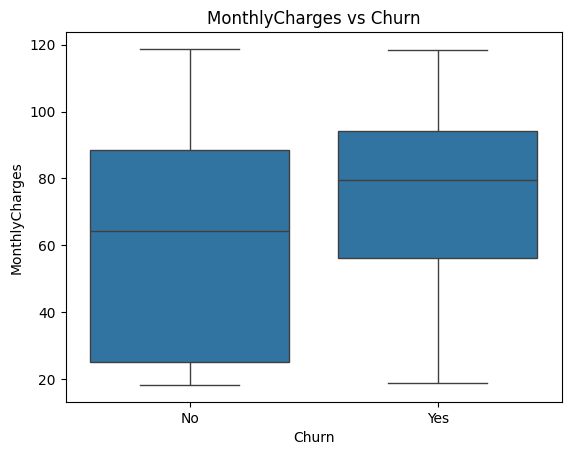

In [11]:
for col in numericas:
    sns.boxplot(data=df, x="Churn", y=col)
    plt.title(f"{col} vs Churn")
    plt.show()


Matriz de correlación:

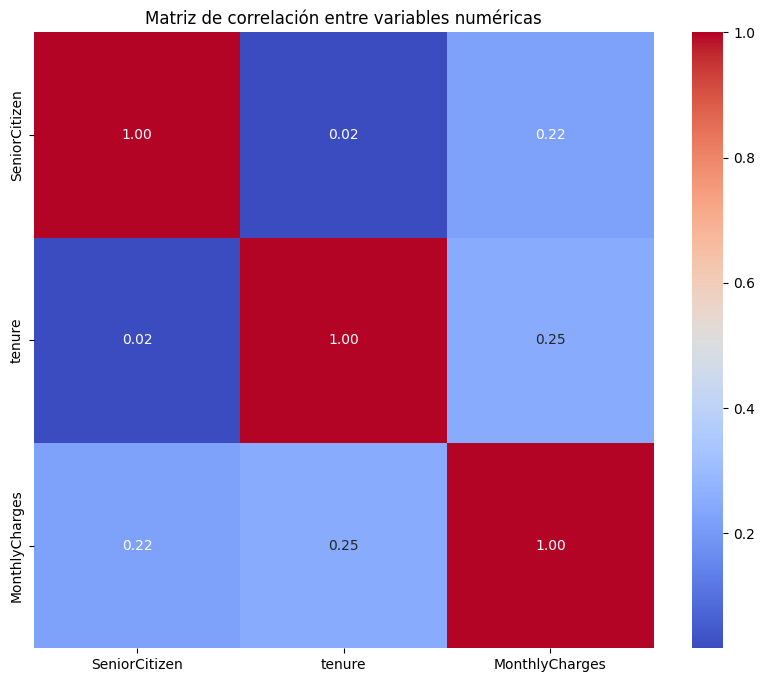

In [12]:
corr = df[numericas].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación entre variables numéricas")
plt.show()


## 4. Detección de valores atípicos y limpieza

Identificamos posibles valores extremos usando el método del IQR. También verificamos valores vacíos o incorrectos en columnas críticas.


In [13]:
for col in numericas:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))).sum()
    print(f"{col}: {outliers} outliers detectados")


SeniorCitizen: 1142 outliers detectados
tenure: 0 outliers detectados
MonthlyCharges: 0 outliers detectados


Celda de código (limpieza específica TotalCharges):

In [14]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
print("Nulos en TotalCharges:", df["TotalCharges"].isnull().sum())
df = df.dropna(subset=["TotalCharges"])


Nulos en TotalCharges: 11


## 5. Preparación para el modelado

Aplicamos transformaciones necesarias para preparar el dataset: codificación de variables categóricas y escalado de las numéricas.
